<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [9]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.stats import norm
import scipy.stats as stats
from math import sqrt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway

#### Read the dataset in the csv file from the URL


In [12]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [13]:
Viviendas=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [16]:
Viviendas

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


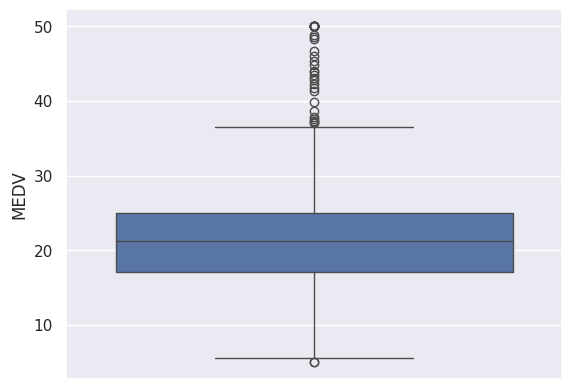

In [18]:
Boxplot = sns.boxplot(y= 'MEDV', data= Viviendas)

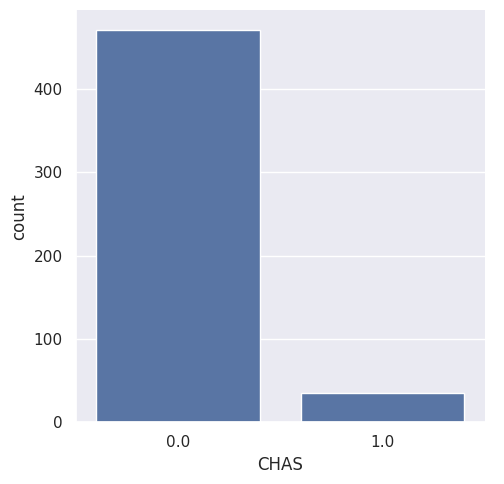

In [19]:
BarChart= sns.catplot(x='CHAS', data= Viviendas, kind= 'count')

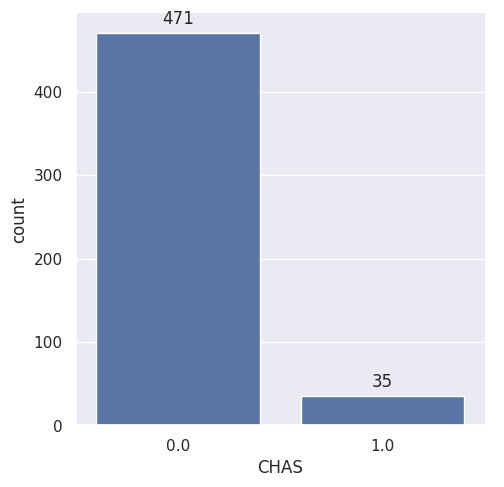

In [20]:
BarChart = sns.catplot(x='CHAS', data=Viviendas, kind='count')
for ax in BarChart.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')

plt.show()

In [30]:
Viviendas['Age_group'] = pd.cut(Viviendas['AGE'], 
                                 bins=[0, 35, 70, 100], 
                                 labels=['35 o menos', '35 a 70', '70 o más'])

Text(0.5, 1.0, 'Boxplot of Pricing by Age Group')

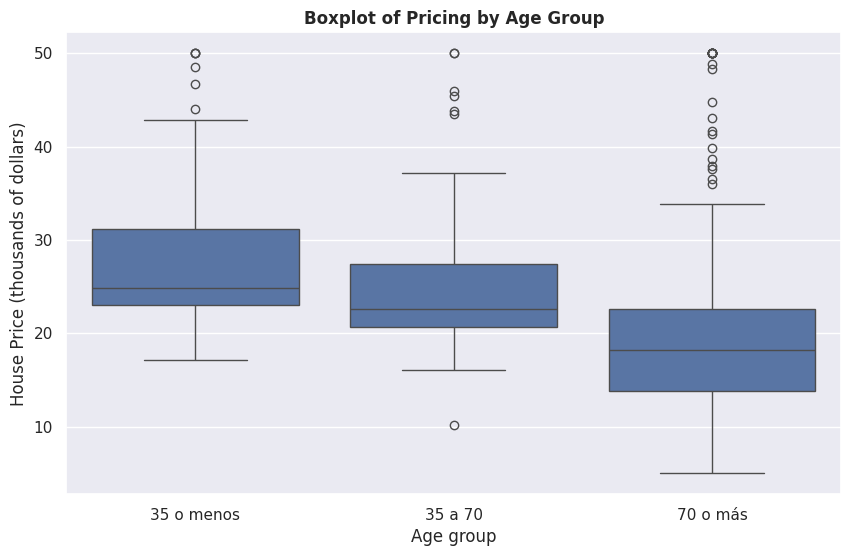

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_group', y='MEDV', data=Viviendas)
plt.ylabel('House Price (thousands of dollars)')
plt.xlabel('Age group')
plt.title('Boxplot of Pricing by Age Group', weight= 'bold')

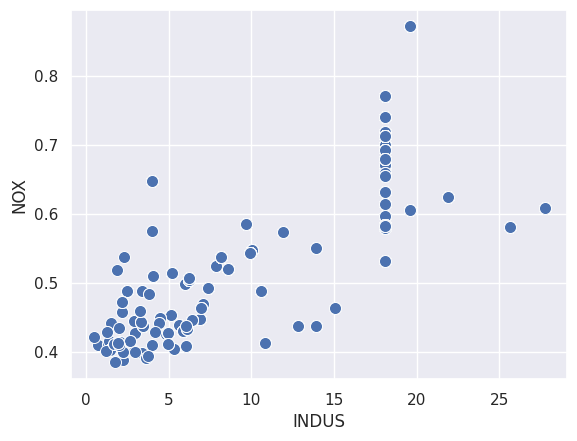

In [23]:
ScatterPlot = sns.scatterplot(x='INDUS', y='NOX', data=Viviendas, s=75)

Text(0.5, 1.0, 'Relacion Acres-Nitrogeno')

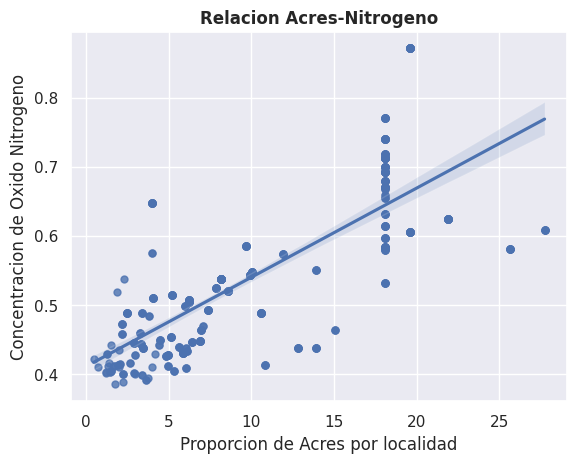

In [24]:
ScatterPlot2 = sns.regplot(x='INDUS', y='NOX', data=Viviendas, scatter_kws={'s': 25})
plt.ylabel('Concentracion de Oxido Nitrogeno')
plt.xlabel('Proporcion de Acres por localidad')
plt.title('Relacion Acres-Nitrogeno', weight= 'bold')

(array([ 15.,   2.,  58.,  15.,  35.,  69.,  76.,  40., 178.,  18.]),
 array([12.6 , 13.54, 14.48, 15.42, 16.36, 17.3 , 18.24, 19.18, 20.12,
        21.06, 22.  ]),
 <BarContainer object of 10 artists>)

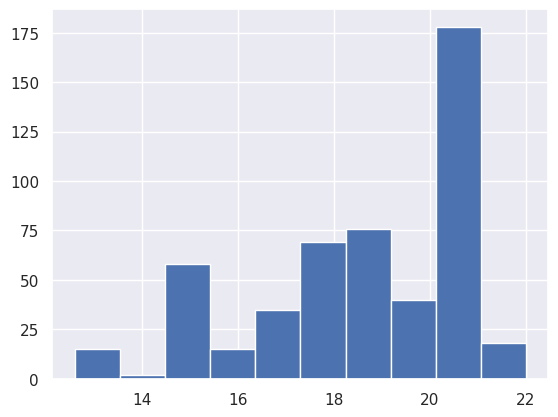

In [25]:
plt.hist(Viviendas['PTRATIO'])

In [26]:
PruebaT = stats.ttest_ind(Viviendas[Viviendas['CHAS'] == 1]['MEDV'],
                          Viviendas[Viviendas['CHAS'] == 0]['MEDV'])
print(PruebaT)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)


In [31]:
Viviendas.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,35 a 70
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 o más
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,35 a 70
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,35 a 70
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,35 a 70


In [35]:
Menos35 = Viviendas[Viviendas['AGE'] < 35]['MEDV'] 
Entre35y70 = Viviendas[(Viviendas['AGE'] >= 35) & (Viviendas['AGE'] <= 70)]['MEDV']
Mas70 = Viviendas[Viviendas['AGE'] > 70]['MEDV']

In [36]:
f_statistic, p_value = stats.f_oneway(Menos35, Entre35y70, Mas70)
print("F-Statistic: {0}, P-Value: {1}".format(f_statistic, p_value))

F-Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [39]:
stats.pearsonr(Viviendas['NOX'], Viviendas['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [41]:
y = Viviendas['MEDV']
x = Viviendas['DIS']
x =sm.add_constant(x)
Modelo = sm.OLS(y,x).fit()
predictions = Modelo.predict()

In [42]:
Modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        13:43:15   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""